# Task # 5 - To explore Business Analytics  - Divya Shah
## Aim :To perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
Problem Statement : You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploratory Data Analysis 

## Checking columns datatypes 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Incorrect Columns Data Type
### Converting Postal code from int dtype into object dtype as we won't do any calculations on it

In [4]:
df['Postal Code'] = df['Postal Code'].astype('object')

## Describing data

In [5]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Checking for any missing data

<AxesSubplot:>

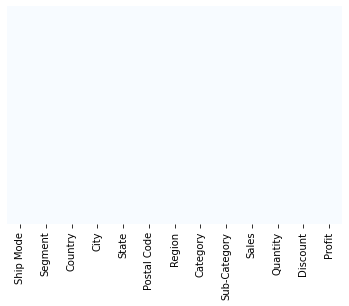

In [6]:
# Let's see if we have any missing data, luckily we don't have any!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Checking for any duplicated entries

In [8]:
#Let's see if we have duplicated entries in the data
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [10]:
#Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

## Plotting correlation matrix

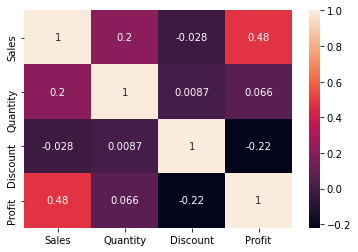

In [11]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

### Observation : Profit and discount have the least correlation

## Visualizing segment count 

<AxesSubplot:xlabel='Segment', ylabel='count'>

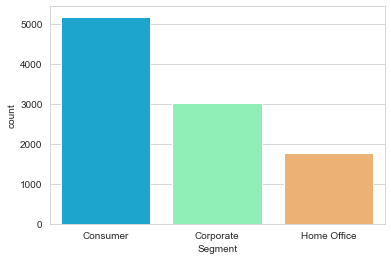

In [12]:
# Let's try to visualize the 'Segment' column from the dataset.

sns.set_style('whitegrid')
sns.countplot(x='Segment',data=df, palette='rainbow')

### Observation : Maximum number of buyers are from 'Consumer' segment and minimum number of buyers are from 'Home office' segment

## Visualizing category count 

<AxesSubplot:xlabel='Category', ylabel='count'>

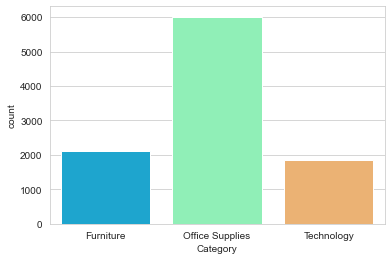

In [13]:
# Let's try to visualize the 'Category' column from the dataset.

sns.set_style('whitegrid')
sns.countplot(x='Category',data=df, palette='rainbow')

### Observation: Most of the items are from office supplies category and least are from techology category

## Visualizing Sub-category percentage values 

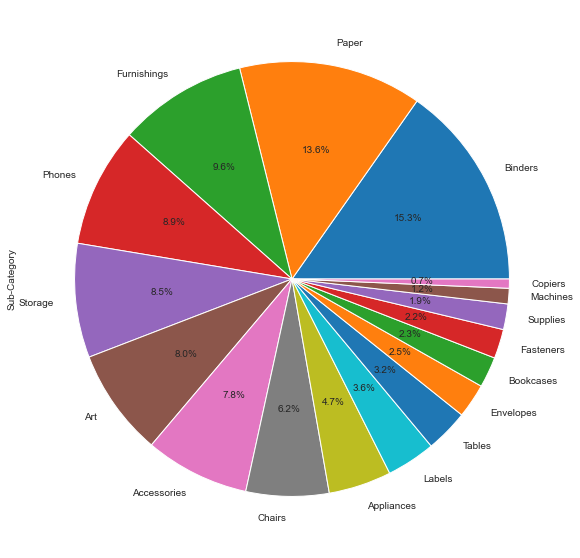

In [14]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Observation: Most of the items are from binders,paper,furnishing,phones,storage,art,accessories sub-category

## Visualizing state count 

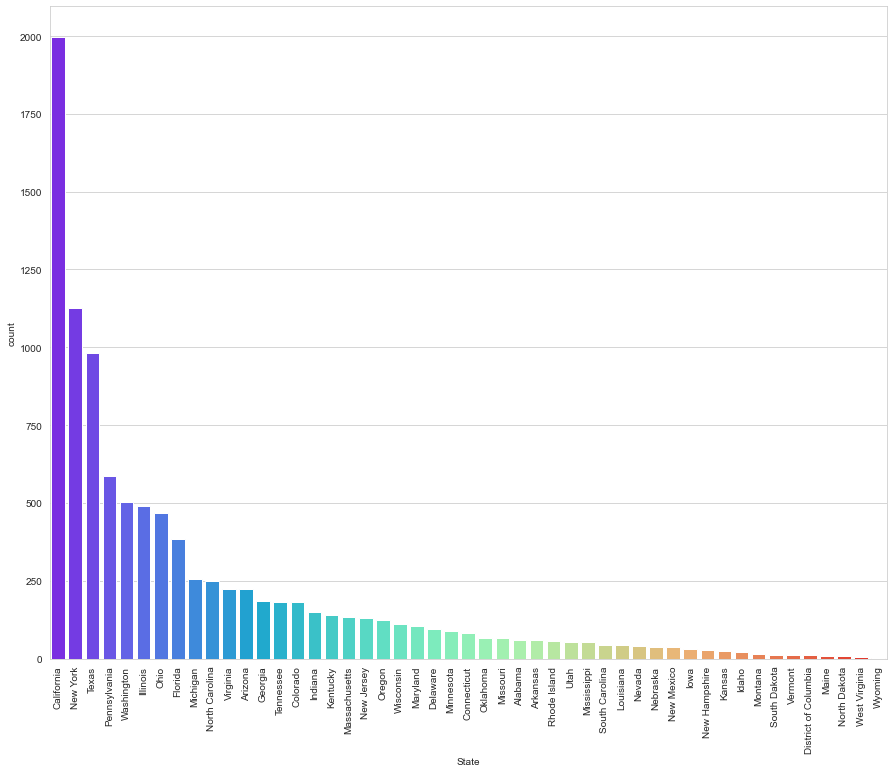

In [15]:
# Let's try to visualize the 'state' column from the dataset.
plt.figure(figsize=(15,12))
sns.set_style('whitegrid')
sns.countplot(x='State',data=df, palette='rainbow',order = df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Observation : Maximum number of buyers are from California and New York 

## Visualizing ship mode count

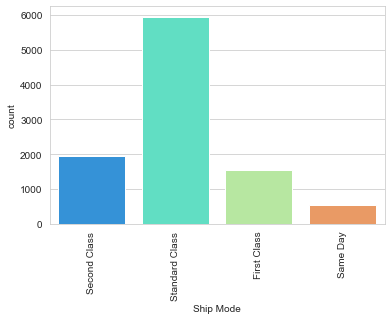

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.show()

### Observation : Maximum number of the items are delivered by Standard Class Ship Mode and least from Same Day ship mode

## Visualization of Sales,Quantity,Discount and Profit using histogram

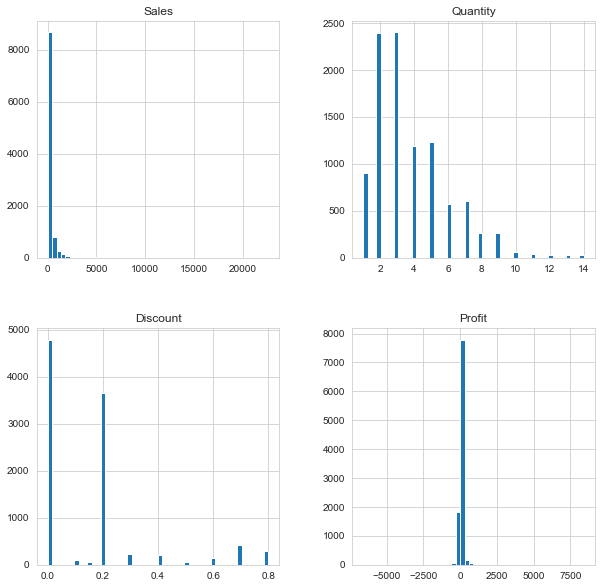

In [17]:
df.hist(figsize=(10,10),bins=50)
plt.show()

### Observation : 
1. Discount given to products is mostly 0 or 20%.
1. Most Customers tend to buy products in 2 or 3 quantities.

## Profit vs Sales 

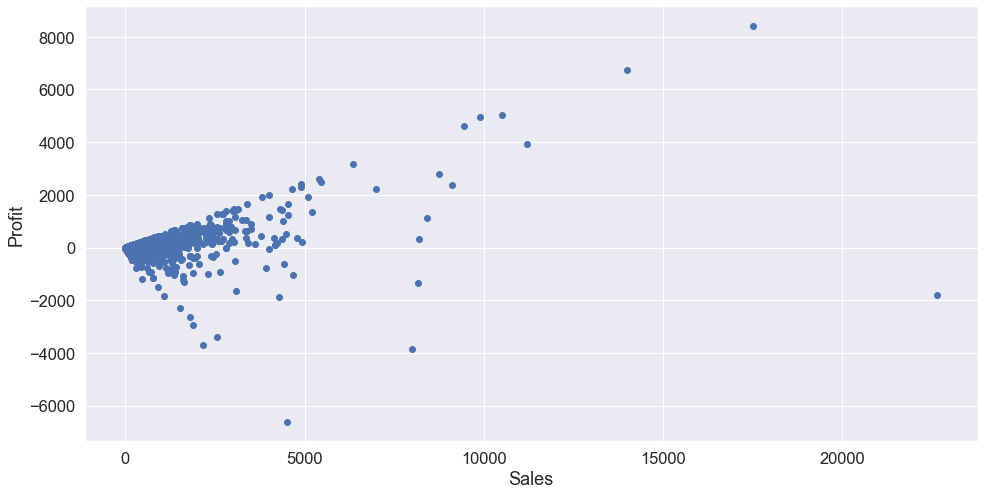

In [18]:
sns.set(font_scale=1.5)  
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Sales'], df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

## Profit vs Discount

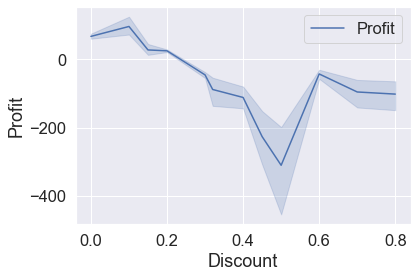

In [19]:
sns.lineplot(x="Discount", y="Profit",label = "Profit",data=df)
plt.legend()
plt.show()

### Observation : We can see there is no correlation between profit and discount

## Profit vs Quantity

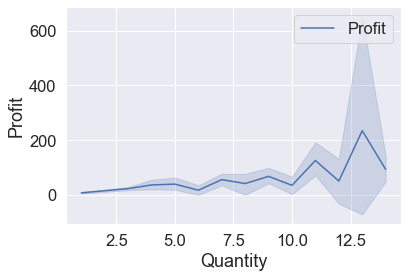

In [20]:
sns.lineplot(x="Quantity", y="Profit",label = "Profit",data=df)
plt.legend()
plt.show()

## Visualizing Discount vs Category 

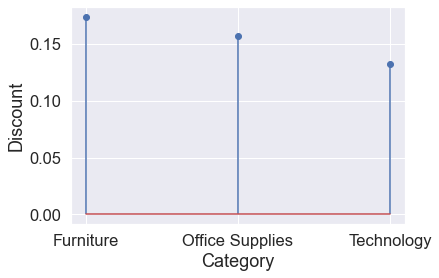

In [21]:
df1 = df.groupby('Category')['Discount'].mean().reset_index().sort_values(by='Discount', ascending=False)
plt.stem(df1['Category'],df1['Discount'], use_line_collection=True)
plt.xlabel('Category')
plt.ylabel('Discount')
plt.show()

### Observation : Most discounted category is furniture and least is technology

## Visualizing profit and sales across different segments

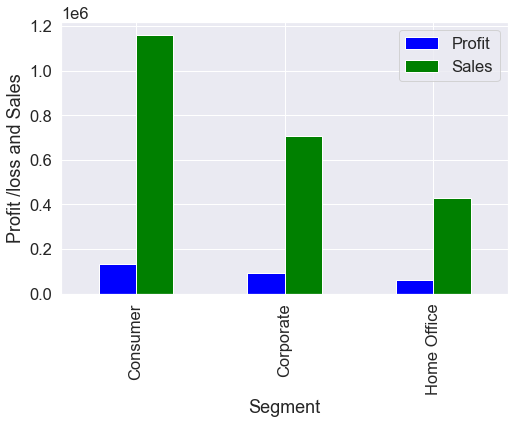

In [22]:
df.groupby("Segment")[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "green"],figsize= (8,5))
plt.ylabel("Profit /loss and Sales")
plt.show()

### Observation : Sales and Profit were highest in consumer segment and least in Home office segment

## Visualizing segment wise sales distribution in each region

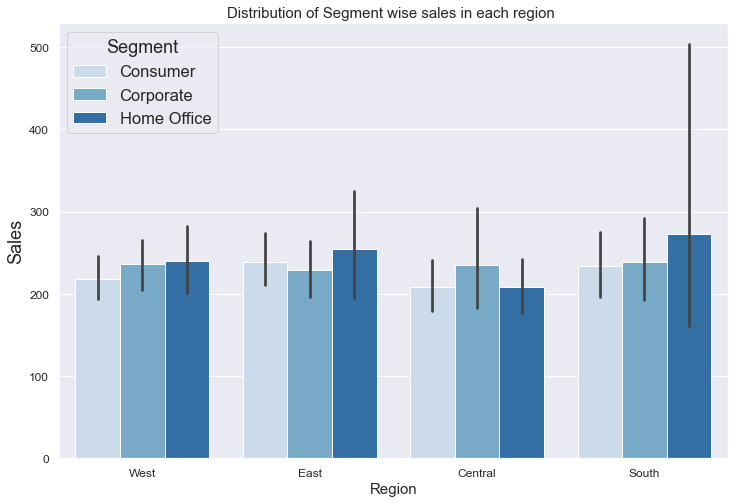

In [23]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Segment wise sales in each region " , fontsize=15)
sns.barplot(x="Region",y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='Blues')
plt.xlabel('Region', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

### Observation : Segment wise sales are almost same in every region.

## Visualizing Profit and sales across different regions

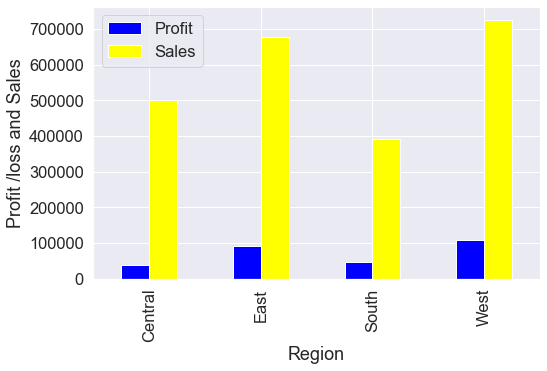

In [24]:
df.groupby("Region")[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "yellow"],figsize= (8,5))
plt.ylabel("Profit /loss and Sales")
plt.show()

### Observation : Western region has the highest sales and profit whereas southern region has the least sales , but a good profit wrt its sales.

## Visualizing profit and sales across states

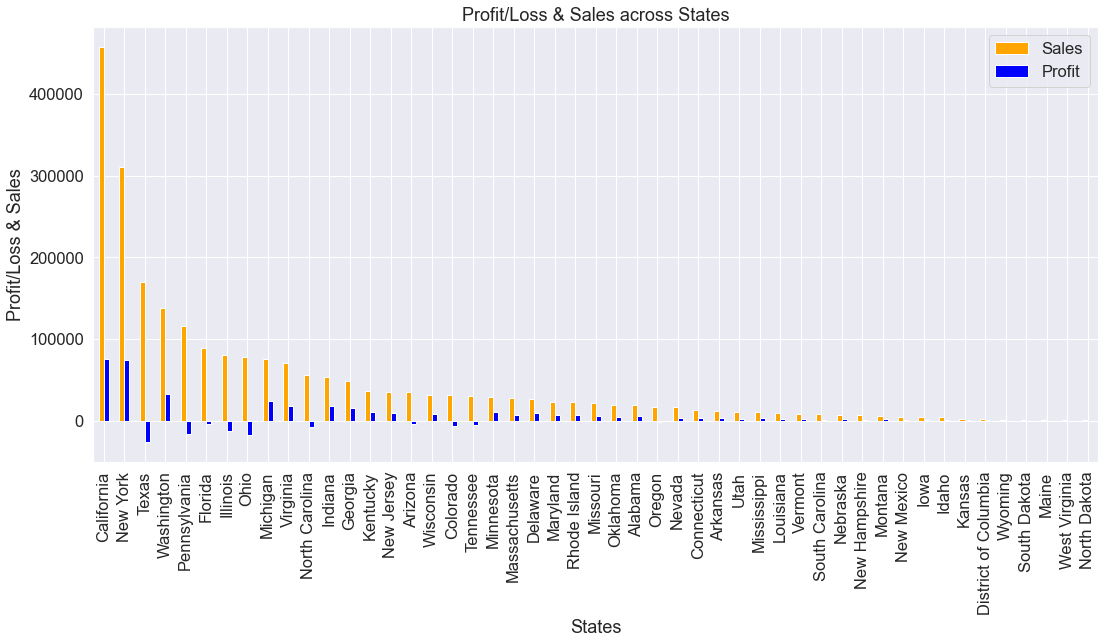

In [25]:
csp = df.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False)
csp[:].plot.bar(color = ["orange", "blue"],figsize= (18,8))
plt.title("Profit/Loss & Sales across States")
plt.xlabel("States")
plt.ylabel("Profit/Loss & Sales")
plt.show()

### Observation : States like California and New York have high sales with a good profit whereas staes like Texas, Pennsylvania, Ohio face huge losses. 

In [26]:
#top 10 states with high sales
top_states= df['State'].value_counts().nlargest(10)
top_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

## Visualizing Profit and Sales across different Categories

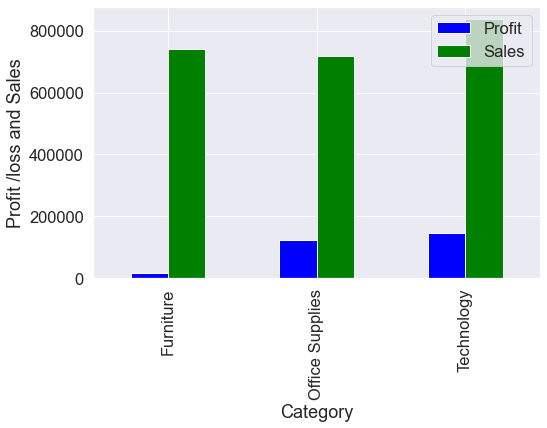

In [27]:
df.groupby("Category")[['Profit', 'Sales']].sum().plot.bar(color = ["blue", "green"],figsize= (8,5))
plt.ylabel("Profit /loss and Sales")
plt.show()

### Observation :
1. Technology and office supplies category have high sales with good profit.
1. Furniture category has least profit.

## Visualizing profit and sales across various Sub-Categories

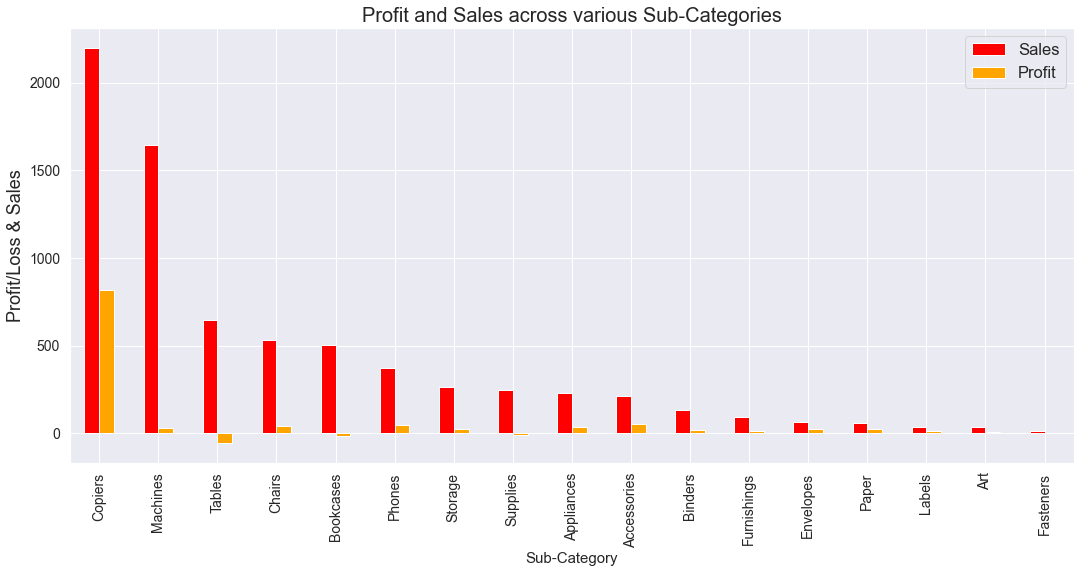

In [28]:
scsp=df.groupby("Sub-Category")[["Sales","Profit"]].mean().sort_values(by = "Sales", ascending = False)
scsp.plot.bar(color=['red','orange'],figsize= (18,8))
plt.title("Profit and Sales across various Sub-Categories",fontsize=20)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel("Profit/Loss & Sales")
plt.tick_params(labelsize=14)
plt.show()

### Observation:
1. Profit and Sales are highest in the Sub-Category 'Copiers'
1. Copiers,machines have high sales.
1. Sub-Category Tables and bookcases are facing losses.

### Summary : 
1. Maximum number of buyers are from 'Consumer' segment and minimum number of buyers are from 'Home office' segment.
1. Maximum number of buyers prefer standard class ship mode.
1. Maximum number of buyers are from California and New York.
1. Sales and Profit were highest in consumer segment and least in Home office segment.The superstore should look for strategic partners who can help them in increasing profit and sales in home office segment.
1. States like California and New York have high sales with a good profit whereas staes like Texas, Pennsylvania, Ohio face huge losses. Surveys should be taken in these low profit states to understand customer's buying behaviour.
1. Furniture category has least profit. Efforts should be taken to increase profit in this category.